# Results for prob1

In [1]:
import json
import os
import matplotlib.pyplot as plt
from openqaoa.algorithms import QAOAResult
import numpy as np

## Upload json files

In [2]:
dir_routes = ['./noiseless','./noisy','./zne']

results = []

for dir_itr,dir_route in enumerate(dir_routes):
    results.append({})
    for file_name in os.listdir(dir_route):
        if file_name.endswith(".json"):
            file_route = os.path.join(dir_route,file_name)
            with open(file_route, "r") as file:
                result = json.load(file)
                result = QAOAResult.from_dict(result)
                results[dir_itr][file_name[0:-5]] = result

The structure is a list of 3 dictionaries. The dictionaries reference to the directory noiseless,noisy and zne in the mentioned order. Each dictionary has the files of each directory.

In [3]:
display(results[0],'\n')
display(results[1],'\n')
display(results[2],'\n')

{'prob1_p6-standard-ramp-x-Powell_noiseless': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x1988cd9fee0>}

'\n'

{'prob1_p6-standard-ramp-x-Powell_noisy': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x1988cd72f80>}

'\n'

{'prob1_p6-standard-ramp-x-Powell_zne_conf0_fold_gates_from_left': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x1988cd9ec50>,
 'prob1_p6-standard-ramp-x-Powell_zne_conf0_fold_gates_from_right': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x1988cd718d0>,
 'prob1_p6-standard-ramp-x-Powell_zne_conf1_fold_gates_from_left': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x1988cd9edd0>,
 'prob1_p6-standard-ramp-x-Powell_zne_conf1_fold_gates_from_right': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x1988cd739d0>,
 'prob1_p6-standard-ramp-x-Powell_zne_conf2_fold_gates_from_left': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x1988cd9ead0>,
 'prob1_p6-standard-ramp-x-Powell_zne_conf2_fold_gates_from_right': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x198ec326cb0>,
 'prob1_p6-standard-ramp-x-Powell_zne_conf3_fold_gates_from_left': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x1988cd9ee60>,
 'prob1_p6-standard-ramp-x-Powell_zne_conf3_fold_gat

'\n'

In [4]:
noiseless_key = list(results[0].keys())[0]
noisy_key = list(results[1].keys())[0]
zne_keys = list(results[2].keys())

## Cost comparison

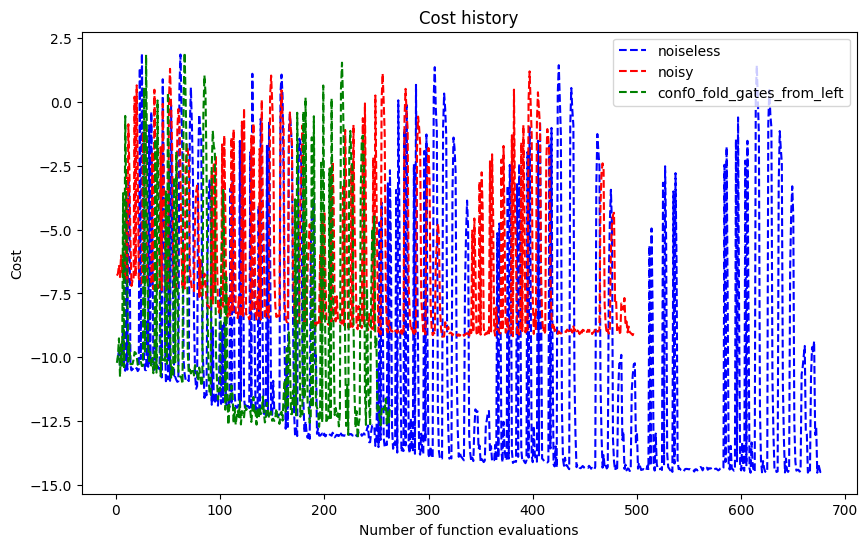

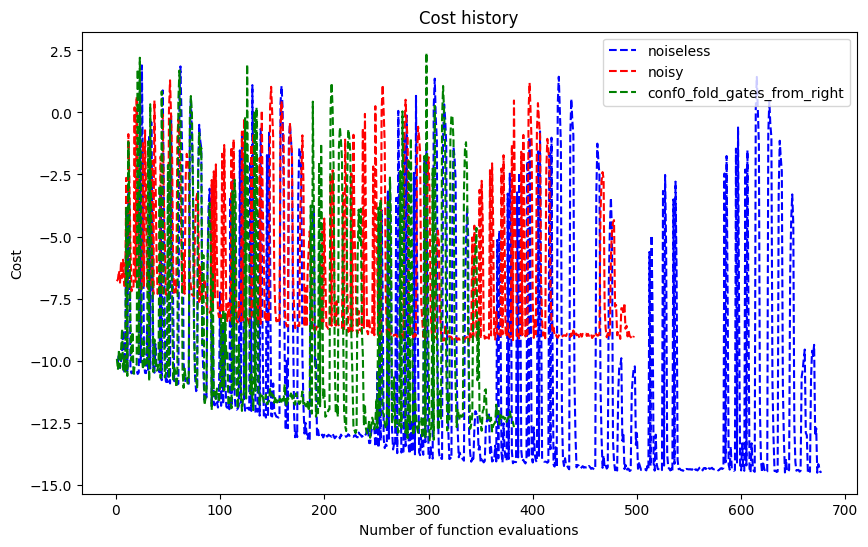

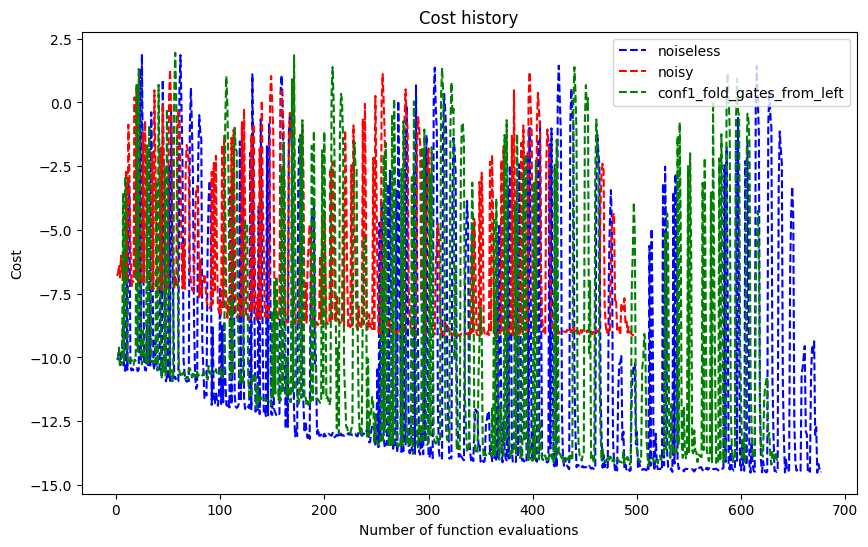

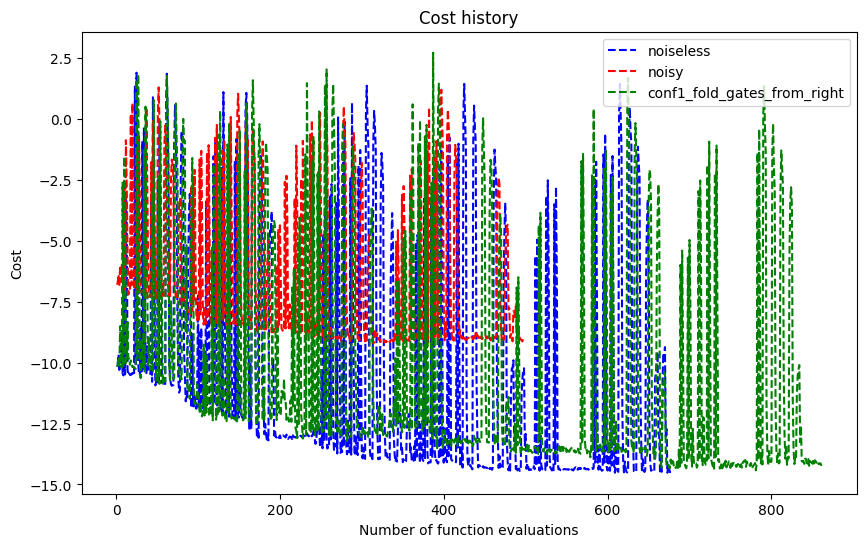

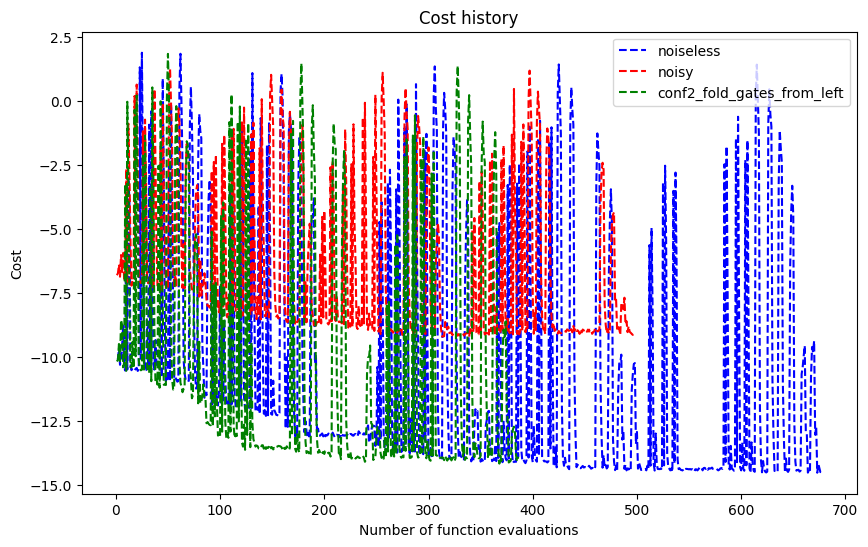

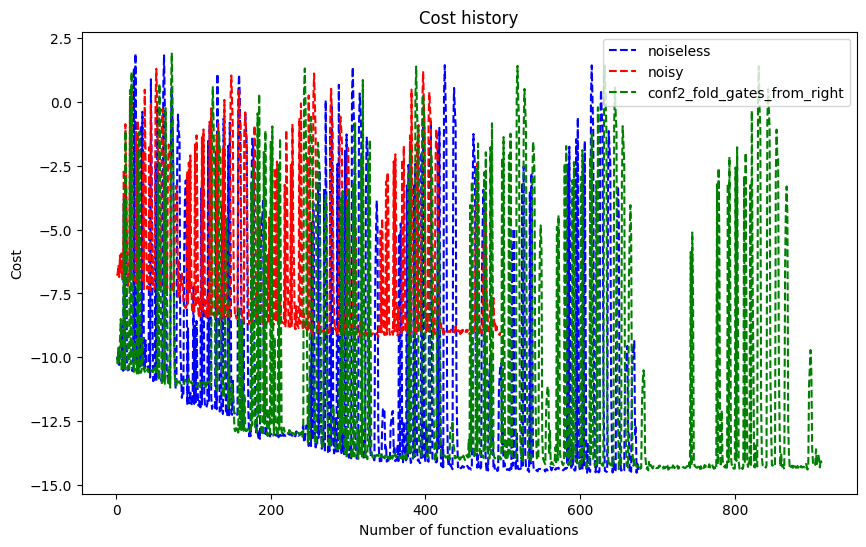

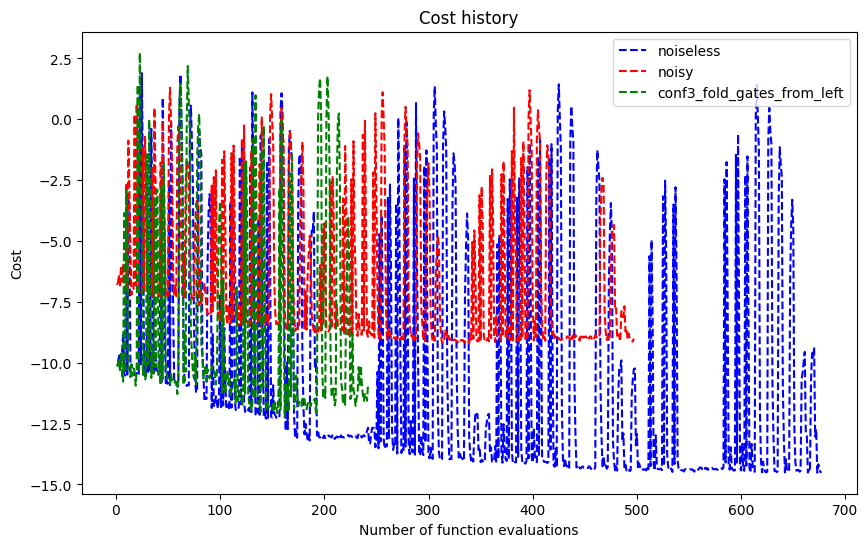

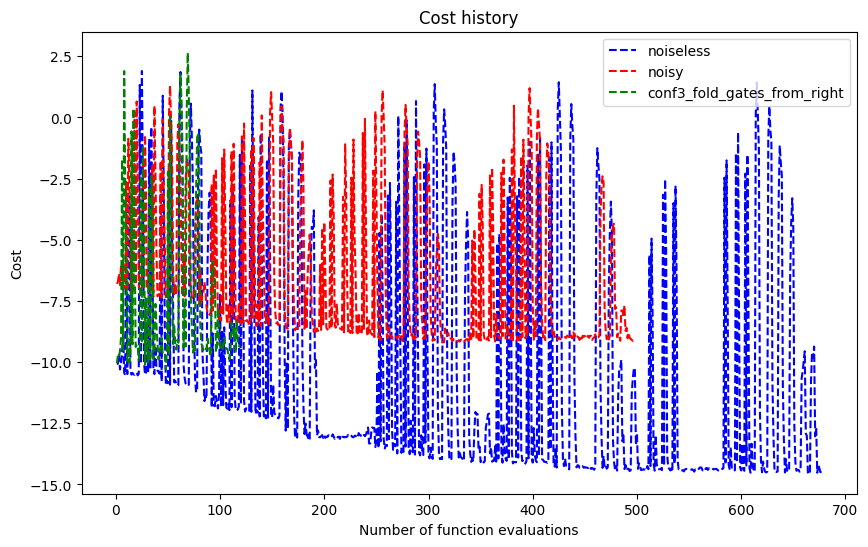

In [5]:
for zne_key in zne_keys:   
    zne_label = zne_key[zne_key.find("conf"):]
    fig, ax = plt.subplots(figsize=(10,6))
    results[0][noiseless_key].plot_cost(figsize=(7,4),color='blue',label='noiseless',ax=ax)
    results[1][noisy_key].plot_cost(figsize=(7,4),color='red',label='noisy',ax=ax)
    results[2][zne_key].plot_cost(figsize=(7,4),color='green',label=zne_label,ax=ax)
    plt.savefig("./imgs/cost_comparison/prob1_costComparison_%s.png" % (str(zne_label)))

For the problem of minimizing the cost, we will define an approximation ratio $R \in [0,1]$ as

$
R = 1 - relative\_error = 1 - \tfrac{|f(x) - \max_x f(x)|}{|\max_x f(x)|}
$



In [6]:
def approximation_ratio(function_cost,optimal_cost):
    ratio = 1- abs(function_cost - optimal_cost) / abs(optimal_cost)
    if ratio < 0: 
        ratio=0.0
    return ratio
approximation_ratio(-4.2,-4)

0.95

C:\Users\Adriano\AppData\Local\Temp\ipykernel_9864\2105438938.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45, ha='right')


[Text(0, 0, 'noiseless'),
 Text(1, 0, 'noisy'),
 Text(2, 0, 'conf0_fold_gates_from_left'),
 Text(3, 0, 'conf0_fold_gates_from_right'),
 Text(4, 0, 'conf1_fold_gates_from_left'),
 Text(5, 0, 'conf1_fold_gates_from_right'),
 Text(6, 0, 'conf2_fold_gates_from_left'),
 Text(7, 0, 'conf2_fold_gates_from_right'),
 Text(8, 0, 'conf3_fold_gates_from_left'),
 Text(9, 0, 'conf3_fold_gates_from_right')]

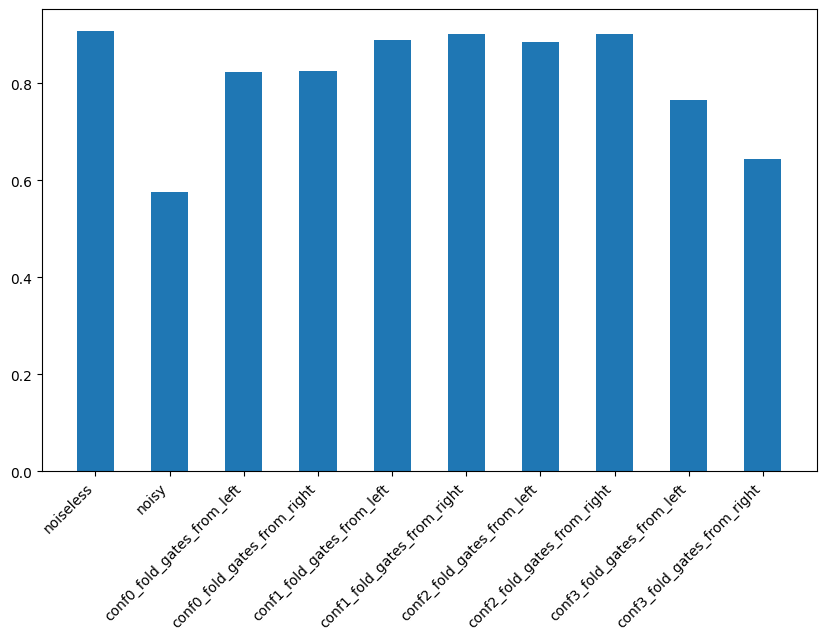

In [7]:
optimal_cost = -16 # took from maxcit_qaoa_zne notebook
noiseless_cost = results[0][noiseless_key].optimized['cost']
noisy_cost = results[1][noisy_key].optimized['cost']

noiseless_aprox = approximation_ratio(noiseless_cost,optimal_cost)
noisy_aprox = approximation_ratio(noisy_cost,optimal_cost)
zne_aproxs = {}

noiseless_fev = results[0][noiseless_key].optimized['eval_number']
noisy_fev = results[1][noisy_key].optimized['eval_number']
zne_fevs = {}

for zne_key in zne_keys:   
    zne_aproxs[zne_key] = approximation_ratio(results[2][zne_key].optimized['cost'],optimal_cost)
    zne_fevs[zne_key] = results[2][zne_key].optimized['eval_number']

categories = ['noiseless','noisy']
aproxs = [noiseless_aprox,noisy_aprox]
fevs = [noiseless_fev,noisy_fev]
for zne_key in zne_keys:   
    zne_label = zne_key[zne_key.find("conf"):]
    categories.append(zne_label)
    aproxs.append(zne_aproxs[zne_key])
    fevs.append(zne_fevs[zne_key])

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, aproxs,width=0.5)
ax.set_xticklabels(categories, rotation=45, ha='right')
